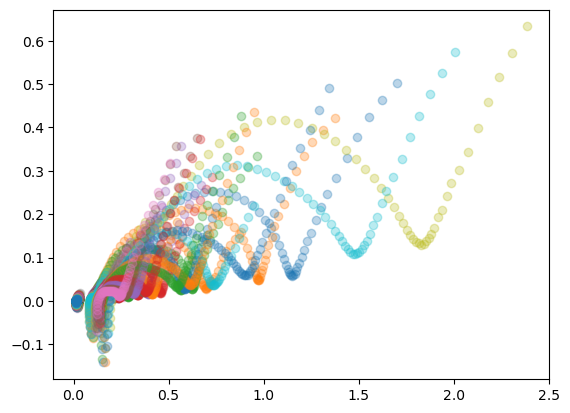

In [81]:
# How to load data
import matplotlib.pyplot as plt
import pickle
import numpy as np

with open('./bit_eis.pkl', 'rb') as f:
    load_data = pickle.load(f)

eis_data = load_data['eis']
freq_all = eis_data['frequency/Hz']
real_all = eis_data['real/ohm']
imag_all = eis_data['-imag/ohm']
temperature = eis_data['temperature/C']

for ith in range(len(eis_data['temperature/C'])):
    for jth in range(len(eis_data['temperature/C'][ith])):
        f = freq_all[ith][jth]
        T = temperature[ith][jth]
        r = real_all[ith][jth]
        i = imag_all[ith][jth]
        plt.plot(r, i,'o', alpha=0.3, label=f'{T}C')
        

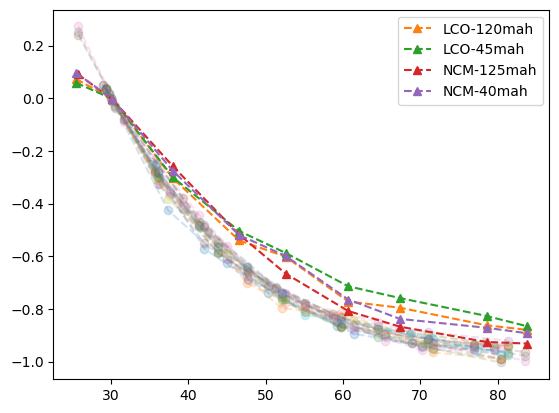

In [82]:
cell_type = load_data['info']['cell_type']
re_data = eis_data['real/ohm']
temperature = eis_data['temperature/C']
freq_data = eis_data['frequency/Hz']

cell_num = len(temperature)
for i in range(cell_num):
    
    t_num = len(temperature[i])
    ΔR_cell_i = []
    Ts_cell_i = temperature[i]
    for j in range(t_num):
        f = freq_data[i][j]
        re = re_data[i][j]
        ΔR = re[np.argmin(np.abs(np.log(f)-np.log(100)))] - re[np.argmin(np.abs(np.log(f)-np.log(1000)))]
        ΔR_cell_i.append(ΔR)
    p = np.polyfit(1/Ts_cell_i[:2], ΔR_cell_i[:2], 1)
    ΔR_ref = np.poly1d(p)(1/30)
    y = ΔR_cell_i / ΔR_ref - 1
    if cell_type[i].lower() != 'lfp-18650-1200mah':
        plt.plot(Ts_cell_i, y, '^--', label=cell_type[i])
    else:
        plt.plot(Ts_cell_i, y, 'o--', alpha=0.2)
plt.legend()